In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We use list comprehension `([np.abs(x - x') for x in x])` and the broadcasting from numpy
to turn a vector $x \in \mathbb{R}$ into a 2D surface $X \in \mathbb{R}^2$

In [49]:
def gaussian_kernel(gamma: float, x: np.array):
    X = [np.exp(-gamma*(np.abs(x - x_)**2)) for x_ in x]
    return np.array(X)

A simple vector $x$:

In [51]:
x = np.array([-1, 0, 1, 2])

With broadcasting, we can turn this into a matrix:

In [52]:
[np.abs(x-x_) for x_ in x]

[array([0, 1, 2, 3]),
 array([1, 0, 1, 2]),
 array([2, 1, 0, 1]),
 array([3, 2, 1, 0])]

And extend that to the full kernel $K(x, x') = exp(-\gamma ||x-x'||^2)$

In [54]:
X = gaussian_kernel(1, x)
X.shape

(4, 4)

let's visualise this as a heatmap

<AxesSubplot: >

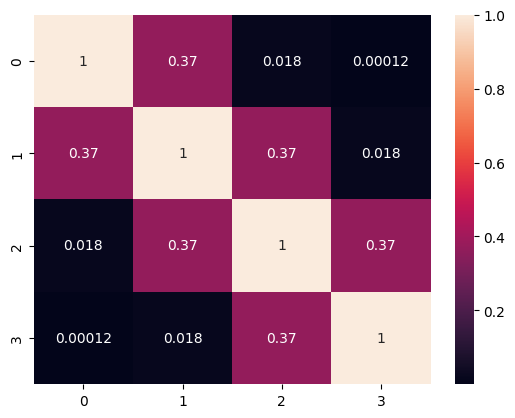

In [55]:
sns.heatmap(X, annot=X)

And now let's transform a 2D space into a 3D space:

In [59]:
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

print(f"X shape: {X.shape}, Y shape: {Y.shape}")

X shape: (20, 20), Y shape: (20, 20)


We can drop the broadcasting

In [60]:
def kernel_2D(gamma: float, X: np.ndarray, Y: np.ndarray):
    return np.exp(-gamma*np.abs(X - Y)**2)

In [61]:
Z = kernel_2D(1.0, X, Y)
Z.shape

(20, 20)

And visualize:

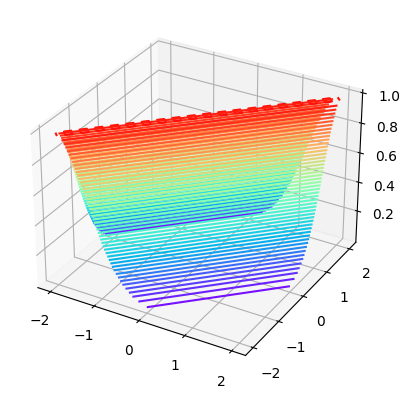

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='rainbow')